### Data Analyze and Preprocess

In [3]:
import pandas as pd
import numpy as np

file_path = r'E:\Private\مینوت و مکاتبات اداری\دوره هوش مصنوعی\HomeWork\HW03/dataset_' #powerplant.dat'
# Skip the first few lines that contain metadata
df = pd.read_csv(file_path, sep=r',', skiprows=32, header=None) # df = pd.read_csv(file_path, sep=r'\s+', skiprows=0, header=None)
'''print("Inputs (df):")
print(df[:])'''
x = np.array(df.iloc[:, 0:-1])
y = np.array(df.iloc[:, -1:])
print("Inputs (x):")
print(x[:]) #.iloc[:, 2:]) # .head(5))
print("\nOutputs (y):")
print(y[:]) # .head(5))"""

Inputs (x):
[[2.95906002 3.0798852  8.38102539 ... 0.85957811 0.88744492 0.95803399]
 [9.30409723 4.90252411 3.04754073 ... 0.86241408 0.56213905 0.78175991]
 [8.97170691 8.84842842 3.04647875 ... 0.76668866 0.83944402 0.10985324]
 ...
 [2.36403419 2.84203025 8.77639096 ... 0.98650532 0.14928646 0.14598403]
 [9.63151069 3.9943976  2.75707093 ... 0.58755755 0.88911835 0.81839133]
 [6.53052662 6.7817899  4.34969522 ... 0.50544105 0.37876093 0.94263083]]

Outputs (y):
[[ 0.05534749]
 [-0.00595746]
 [ 0.00347088]
 ...
 [-0.03180989]
 [ 0.03778881]
 [ 0.04526331]]


In [4]:
#import numpy as np
print(x.dtype.name)
print(y.dtype.name)
print(x.__len__()," x ",int(x.size/x.__len__()))
print(y.__len__()," x ",int(y.size/y.__len__()))

float64
float64
10000  x  12
10000  x  1


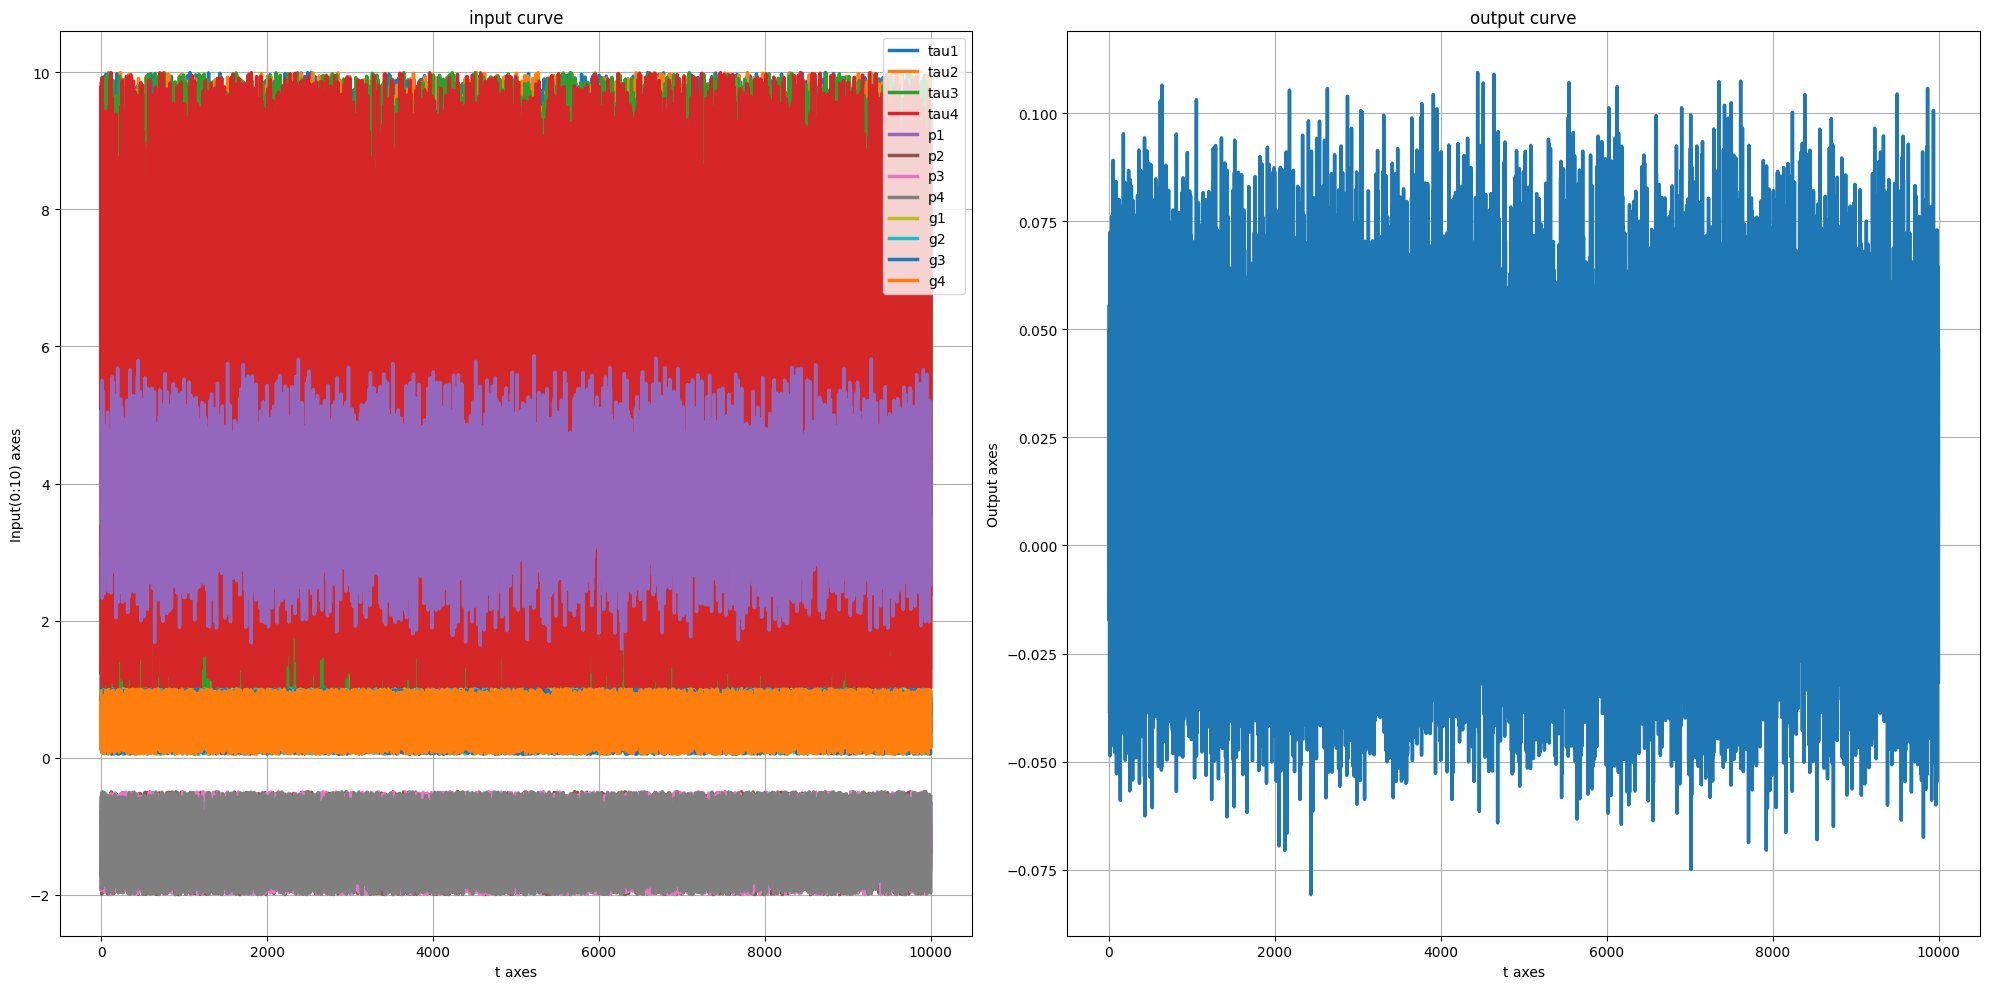

In [6]:
import numpy as np
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

for ind in range(int(x.size/x.__len__())):
    ax1.plot(x[:,ind],linestyle ='-', linewidth=2.5)
ax1.set_title("input curve")
ax1.set_xlabel("t axes")
ax1.set_ylabel("Input(0:10) axes")
# ax1.legend(['input_1','input_2','input_3','input_4','input_5','input_6','input_7','input_8','input_9','input_10'])
ax1.legend(['tau1','tau2','tau3','tau4','p1','p2','p3','p4','g1','g2','g3','g4'])
ax1.grid(True)

for ind in range(int(y.size/y.__len__())):
    ax2.plot(y[:,ind],linestyle ='-', linewidth=2.5)
ax2.set_title("output curve")
ax2.set_xlabel("t axes")
ax2.set_ylabel("Output axes")
# ax2.legend(['stab'])
ax2.grid(True)
plt.tight_layout()
plt.show()


### Least Square Estimation Method

LS Coefficients: [[ 0.00443784]
 [ 0.00381538]
 [ 0.00376332]
 [ 0.0039042 ]
 [ 0.04352765]
 [ 0.04312747]
 [ 0.04568598]
 [ 0.04431969]
 [ 0.03839874]
 [ 0.03843142]
 [ 0.04027686]
 [ 0.03806396]
 [-0.14367845]]

MSE: 0.0004945885721981782
R^2: 0.46662464454408215


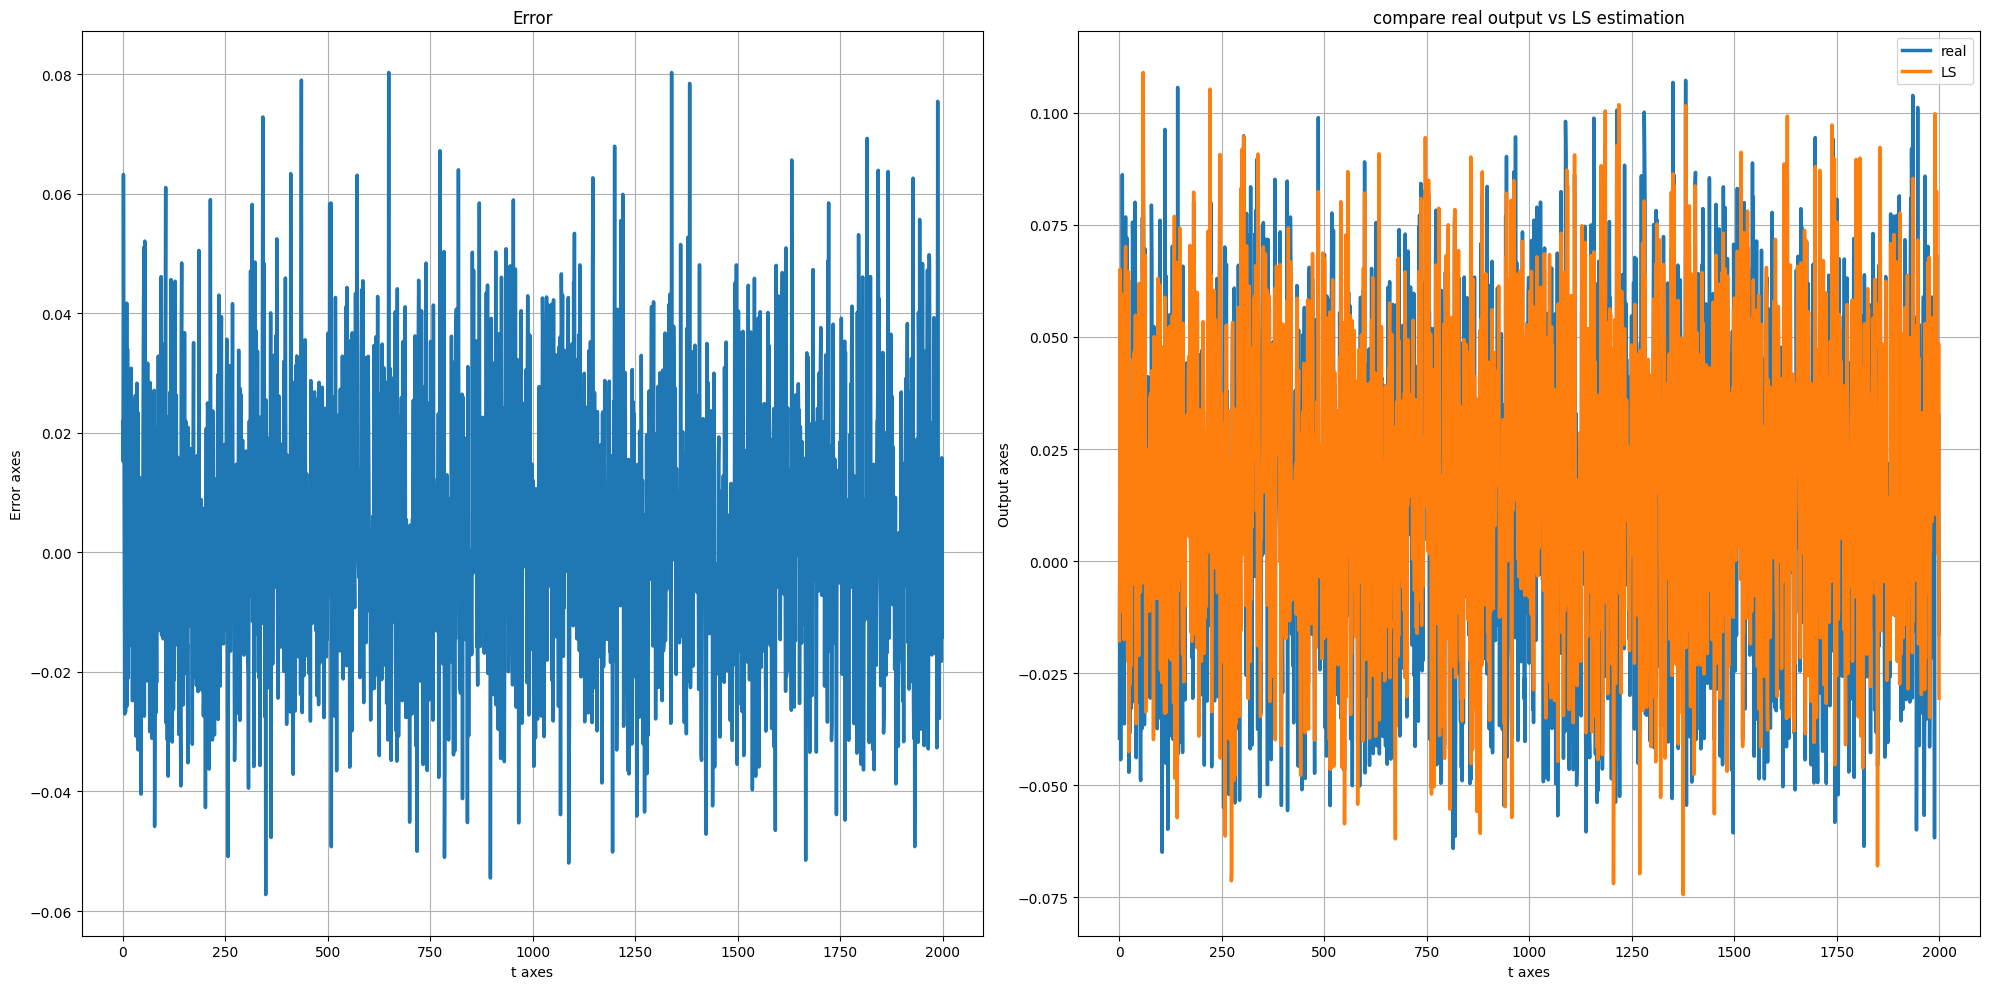

In [155]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

def transpose(X):
    return np.transpose(X)
'''xTrans = np.matmul(transpose(x),x)
print(xTrans.__len__(), ' X ',int(xTrans.size/xTrans.__len__()))'''

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

ex = np.insert(x, x.shape[1], 1, axis=1)
'''print(ex)
print(ex.dtype.name)
print(ex.__len__()," x ",int(ex.size/ex.__len__()))'''

X_train, X_test, y_train, y_test = train_test_split(ex, y, test_size=0.2, random_state=100)
#print(X_train.shape)

# theta = (X'X)^-1*X'*Y
theta = np.matmul(np.matmul(np.linalg.inv(np.matmul(transpose(X_train),X_train)),transpose(X_train)),y_train)
print("LS Coefficients:", theta)

LSy_pred = np.matmul(X_test, theta)
#print(y_hat)
#print(y_hat.__len__(), ' X ',int(y_hat.size/y_hat.__len__()))

error = LSy_pred - y_test
ax1.plot(error, linestyle ='-', linewidth=2.5)
ax1.set_title("Error")
ax1.set_xlabel("t axes")
ax1.set_ylabel("Error axes")
ax1.grid(True)

mse = mean_squared_error(LSy_pred, y_test)
r2 = r2_score(LSy_pred, y_test)
print("\nMSE:", mse)
print("R^2:", r2)

ax2.plot(y_test, linestyle ='-', linewidth=2.5)
ax2.plot(LSy_pred, linestyle ='-', linewidth=2.5)
ax2.set_title("compare real output vs LS estimation")
ax2.set_xlabel("t axes")
ax2.set_ylabel("Output axes")
ax2.legend(['real','LS'])
ax2.grid(True)
plt.tight_layout()
plt.show()



### Linear Regression Estimation Method

MSE: 0.0004837879345265643
R^2: 0.6491189225257574

LR Coefficients: [[ 3.61879841e-03  3.68494975e-03  3.66427204e-03  3.78245478e-03
   1.18173268e-04  8.58323466e-05  4.64047688e-04 -6.68053302e-04
   3.83987365e-02  3.84314176e-02  4.02768637e-02  3.80639573e-02]]
Intercept: [-0.14367845]


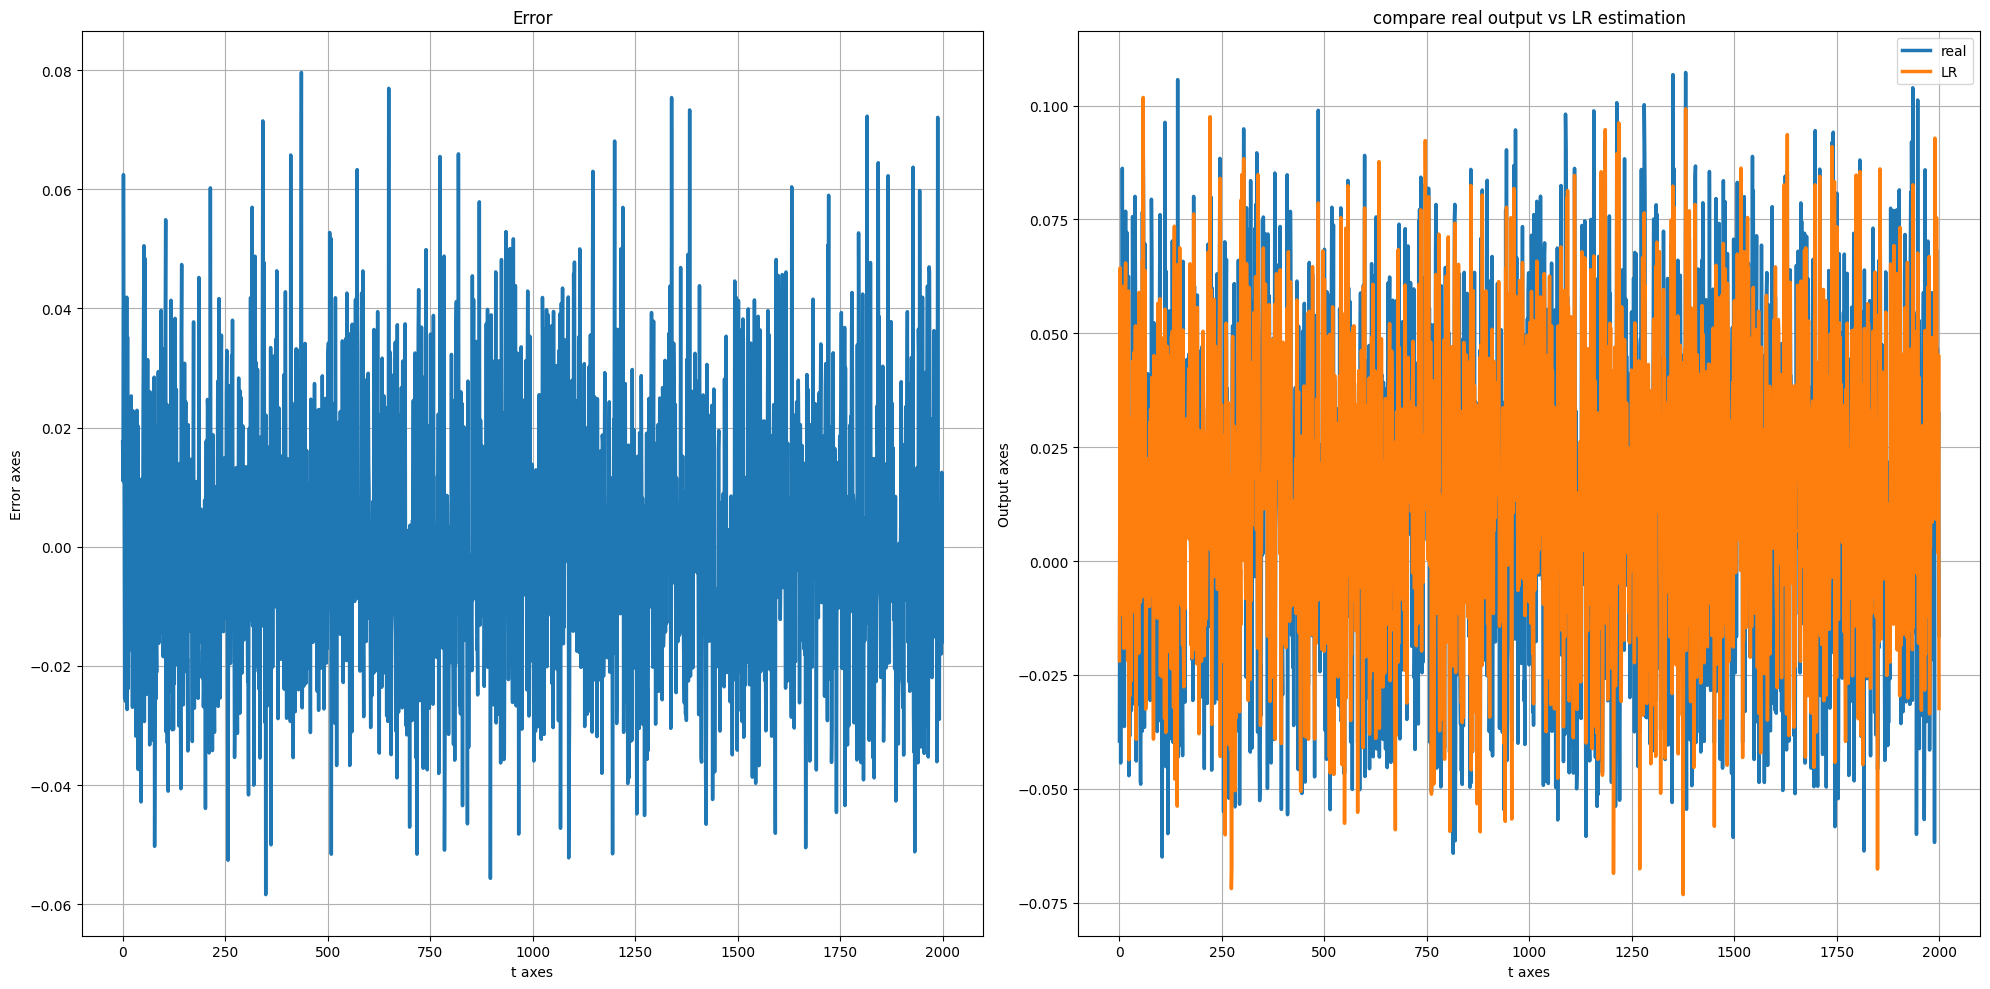

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)
#print(X_train.shape)

model = LinearRegression()
model.fit(X_train, y_train)
Ry_pred = model.predict(X_test)

mse = mean_squared_error(y_test, Ry_pred)
r2 = r2_score(y_test, Ry_pred)

print("MSE:", mse)
print("R^2:", r2)

print("\nLR Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

'''Ry_pred = model.predict(x)
plt.plot(y[:,ind],linestyle ='-', linewidth=2.5)
plt.plot(Ry_pred[:,ind],linestyle ='-', linewidth=2.5)
plt.title("compare real output and regression estimated")
plt.xlabel("t axes")
plt.ylabel("Output axes")
plt.legend(['real','regression'])
plt.grid(True)
plt.tight_layout()
plt.show()'''

error = Ry_pred - y_test
ax1.plot(error, linestyle ='-', linewidth=2.5)
ax1.set_title("Error")
ax1.set_xlabel("t axes")
ax1.set_ylabel("Error axes")
ax1.grid(True)

ax2.plot(y_test, linestyle ='-', linewidth=2.5)
ax2.plot(Ry_pred, linestyle ='-', linewidth=2.5)
ax2.set_title("compare real output vs LR estimation")
ax2.set_xlabel("t axes")
ax2.set_ylabel("Output axes")
ax2.legend(['real','LR'])
ax2.grid(True)
plt.tight_layout()
plt.show()


### multilayer perceptron Estimation Method

Epoch 0, Loss: 1.289560
Epoch 500, Loss: 0.044605
Epoch 1000, Loss: 0.025332
Epoch 1500, Loss: 0.020283
Epoch 2000, Loss: 0.018430
Epoch 2500, Loss: 0.017493
Epoch 3000, Loss: 0.016867
Epoch 3500, Loss: 0.016370
Epoch 4000, Loss: 0.015944
Epoch 4500, Loss: 0.015569

MSE: 0.0005594070395736879
R^2: 0.5942739973778448


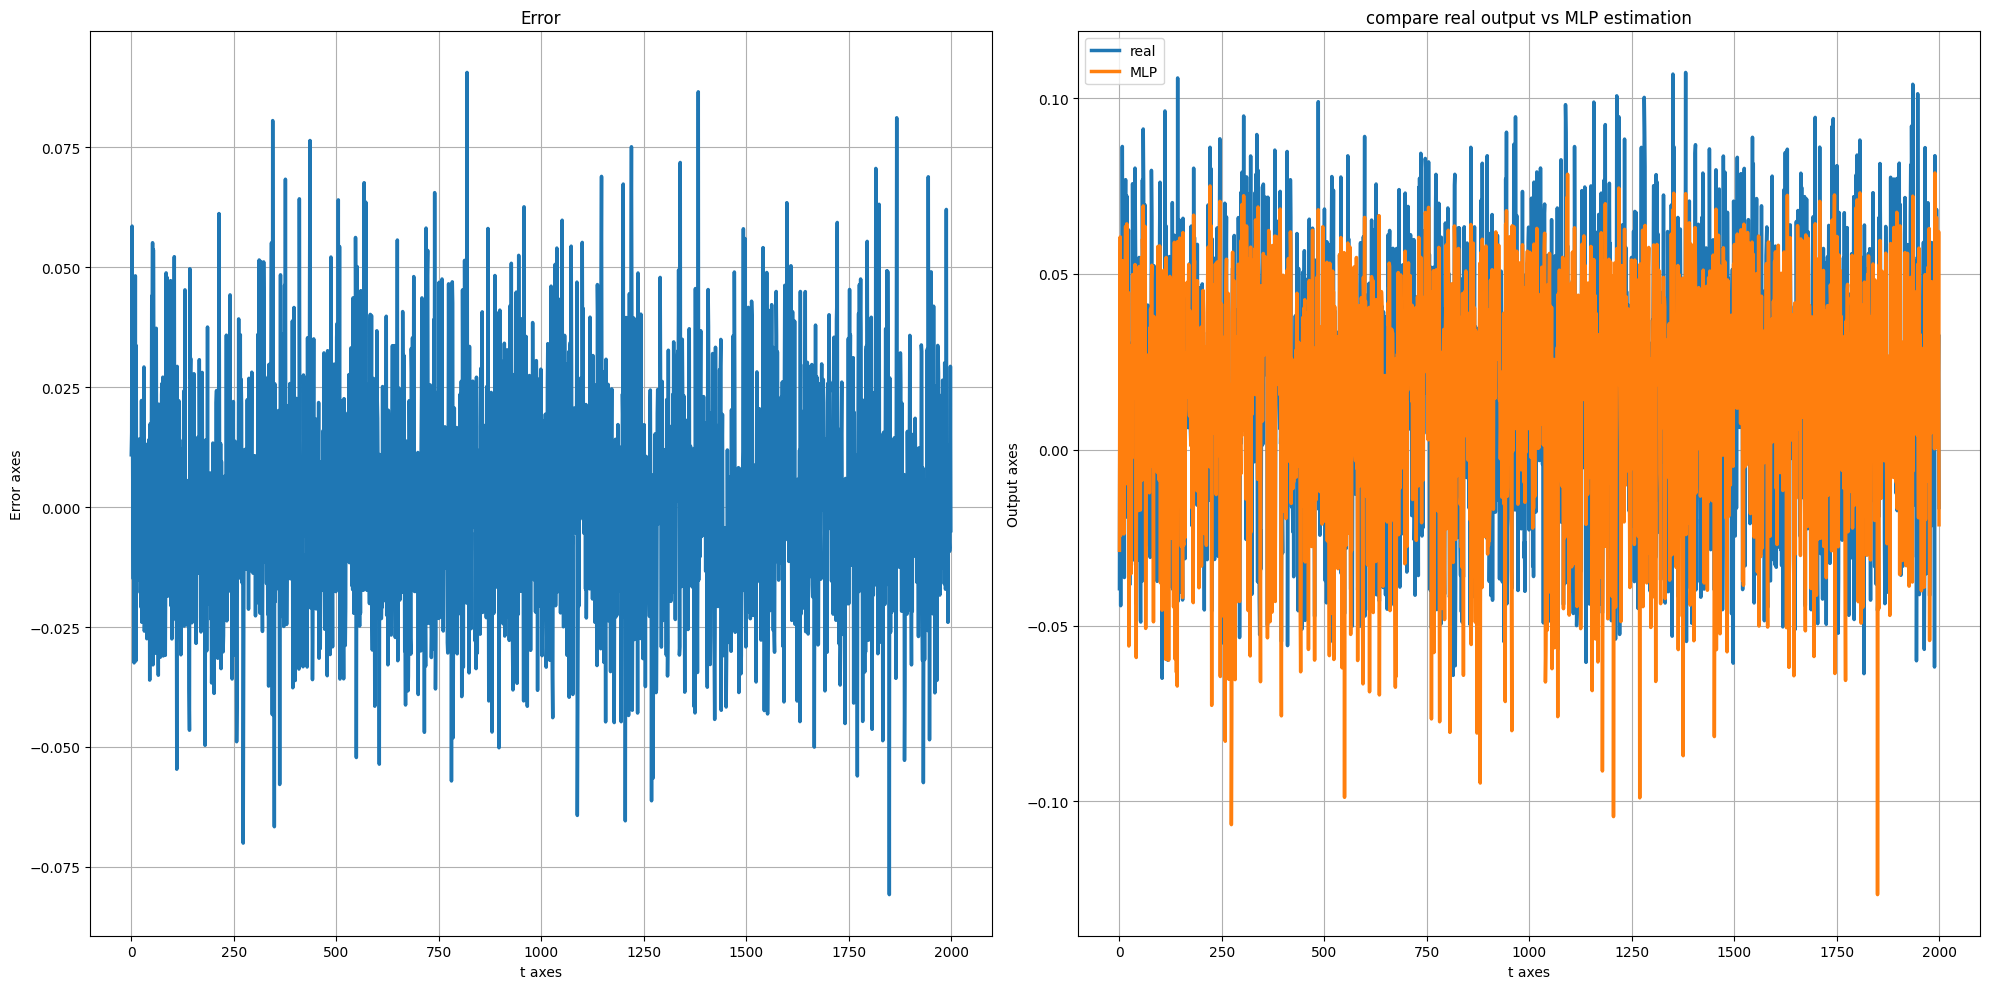

In [9]:
import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# تعریف کلاس MLP
class MLP:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights and biases
        self.W1 = np.random.randn(input_size, hidden_size) * 0.5
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.5
        self.b2 = np.zeros((1, output_size))
        #print(self.W1,self.W2,self.b1,self.b2)
        
    '''def sigmoid(self, x):
        # Sigmoid activation function with numerical stability
        # x = np.clip(x, -500, 500)  # Prevent overflow
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_derivative(self, x):
        # Derivative of sigmoid
        return x * (1 - x)
    '''
    def sigmoid(self, x, Derivative=False):
        s = 1 / (1 + np.exp(-x))
        return s * (1 - s) if Derivative else s
    
    def tanh(self, x, Derivative=False):
        s = np.tanh(x)
        return (1 - s**2) if Derivative else s
    
    def forward(self, X):
        # Forward propagation
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.tanh(self.z1) # self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.output = self.tanh(self.z2) # self.sigmoid(self.z2)
        return self.output
    
    def backward(self, X, y, output, learning_rate):
        # Backward propagation
        m = X.shape[0]
        
        # Calculate gradients
        d_output = output - y
        dW2 = (1/m) * np.dot(self.a1.T, d_output)
        db2 = (1/m) * np.sum(d_output, axis=0, keepdims=True)
        
        # d_hidden = np.dot(d_output, self.W2.T) * self.sigmoid(self.a1, True) # * self.sigmoid_derivative(self.a1)
        d_hidden = np.dot(d_output, self.W2.T) * self.tanh(self.a1, True)
        dW1 = (1/m) * np.dot(X.T, d_hidden)
        db1 = (1/m) * np.sum(d_hidden, axis=0, keepdims=True)
        
        # Update weights and biases
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1
    
    def train(self, X, y, epochs, learning_rate):
        # Training function
        losses = []
        
        for epoch in range(epochs):
            # Forward pass
            output = self.forward(X)
            
            # Calculate loss (Mean Squared Error)
            loss = np.mean((output - y) ** 2)
            losses.append(loss)
            
            # Backward pass
            self.backward(X, y, output, learning_rate)
            
            if epoch % 500 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.6f}")
        
        return losses
    
    def predict(self, X):
        # Make predictions
        return self.forward(X)

class G_Normalize:
    def __init__(self, A):
        self.array = np.array(A)
        self.mean_val = np.mean(self.array, axis=0)
        self.std_val = np.std(self.array, axis=0)
            
    def normalize(self):
        Norm_Array = (self.array - self.mean_val) / self.std_val # (self.array - self.min_val) / (self.max_val - self.min_val)
        return Norm_Array

    def get_mean(self):
        return self.mean_val
    
    def get_std(self):
        return self.std_val
    
class L_Normalize:
    def __init__(self, A):
        self.array = np.array(A)
        self.min_val = np.min(self.array, axis=0)
        self.max_val = np.max(self.array, axis=0)
            
    def normalize(self):
        Norm_Array = (self.array - self.min_val) / (self.max_val - self.min_val)
        return Norm_Array

    def get_min(self):
        return self.min_val
    
    def get_max(self):
        return self.max_val

# داده‌های نمونه
# X = np.random.rand(1000, 10)  # 1000 نمونه با 10 ویژگی
# y = np.random.rand(1000, 1)    # 1000 خروجی
'''normX = G_Normalize(x)
nX = normX.normalize()
normY = G_Normalize(y)
nY = normY.normalize()'''
normX = L_Normalize(x)
nX = normX.normalize()
normY = L_Normalize(y)
nY = normY.normalize()
'''print(x - (nX * normX.get_std() + normX.get_mean()))
print(x.dtype.name)
print(x.__len__()," x ",int(x.size/x.__len__()))
print(nX.dtype.name)
print(nX.__len__()," x ",int(nX.size/nX.__len__()))
print(nY.__len__()," x ",int(nY.size/nY.__len__()))'''

X_train, X_test, Y_train, Y_test = train_test_split(nX, nY, test_size=0.2, random_state=100)

# ایجاد مدل MLP با 16 لایه میانی
input_size = 12 # 10
hidden_size = 25
output_size = 1
learning_rate = 0.01
epochs = 5000 
mlp = MLP(input_size, hidden_size, output_size)

losses = mlp.train(X_train, Y_train, epochs, learning_rate)

MLPy_pred = mlp.predict(X_test)

mse = mean_squared_error(Y_test* (normY.get_max() - normY.get_min()) + normY.get_min(), MLPy_pred* (normY.get_max() - normY.get_min()) + normY.get_min()) # np.mean((MLPy_pred - Y_test) ** 2)
r2 = r2_score(Y_test* (normY.get_max() - normY.get_min()) + normY.get_min(), MLPy_pred* (normY.get_max() - normY.get_min()) + normY.get_min())

print("\nMSE:", mse) # print(f"\nTest Loss: {test_loss:.6f}")
print("R^2:", r2)

# error = (MLPy_pred - Y_test) * normY.get_std() 
error = (MLPy_pred - Y_test) * (normY.get_max() - normY.get_min())
ax1.plot(error, linestyle ='-', linewidth=2.5)
ax1.set_title("Error")
ax1.set_xlabel("t axes")
ax1.set_ylabel("Error axes")
ax1.grid(True)

# ax2.plot(Y_test * normY.get_std() + normY.get_mean(), linestyle ='-', linewidth=2.5)
# ax2.plot(MLPy_pred * normY.get_std() + normY.get_mean(), linestyle ='-', linewidth=2.5)
ax2.plot(Y_test * (normY.get_max() - normY.get_min()) + normY.get_min(), linestyle ='-', linewidth=2.5)
ax2.plot(MLPy_pred * (normY.get_max() - normY.get_min()) + normY.get_min(), linestyle ='-', linewidth=2.5)
ax2.set_title("compare real output vs MLP estimation")
ax2.set_xlabel("t axes")
ax2.set_ylabel("Output axes")
ax2.legend(['real','MLP'])
ax2.grid(True)
plt.tight_layout()
plt.show()
